# ASSIGNMENT 4

The following questions refer to the dataset “Autoparts.csv” posted on Canvas. The data contains information about sales of auto parts from 18 sales regions around the USA. For each region, we have data on sales amount (in thousands of dollars, denoted by “Sales”), the amount of money spent on marketing (in thousands of dollars, denoted by “Mktg”) as well as the number of sales outlets, the size of the population (measured in millions), the number of registered vehicles (also measured in millions), and the number of sales reps per region. The following questions refer to this data.

In [2]:
data<-read.csv('Autoparts.csv')

In [3]:
data

Region,Sales,Mktg,Outlets,Popn,Vehicles,Reps
1,78,482,482,3,1,8
2,59,429,262,2,1,10
3,71,84,604,4,1,11
4,117,245,837,5,2,13
5,99,134,819,7,3,9
6,127,461,939,7,3,14
7,38,323,158,1,0,6
8,79,351,497,3,1,9
9,104,298,796,6,2,14
10,47,253,305,3,1,7


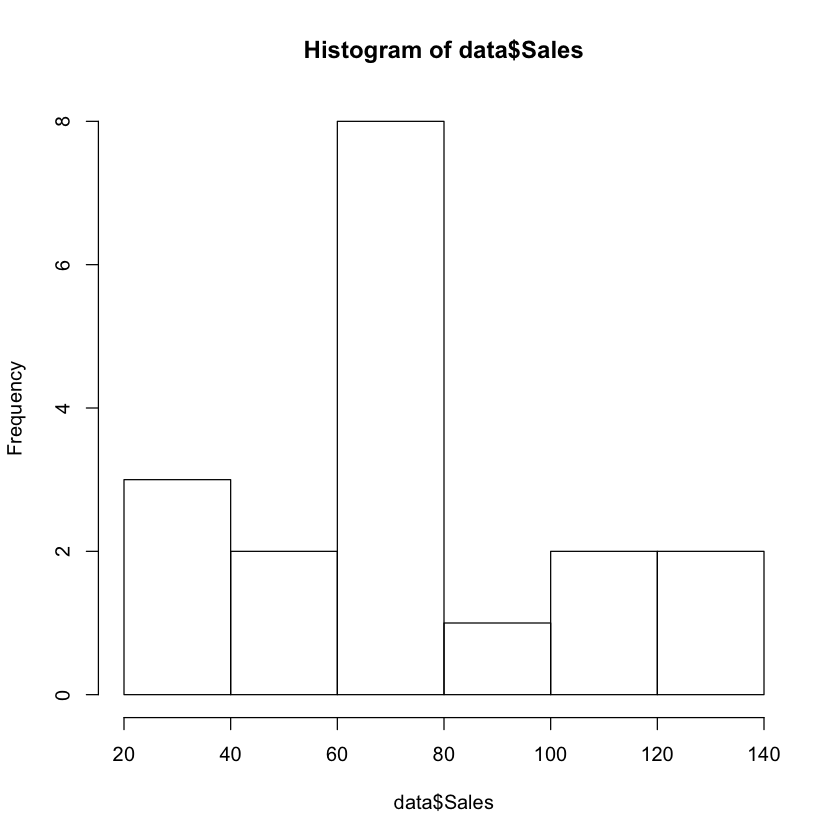

In [4]:
hist(data$Sales)

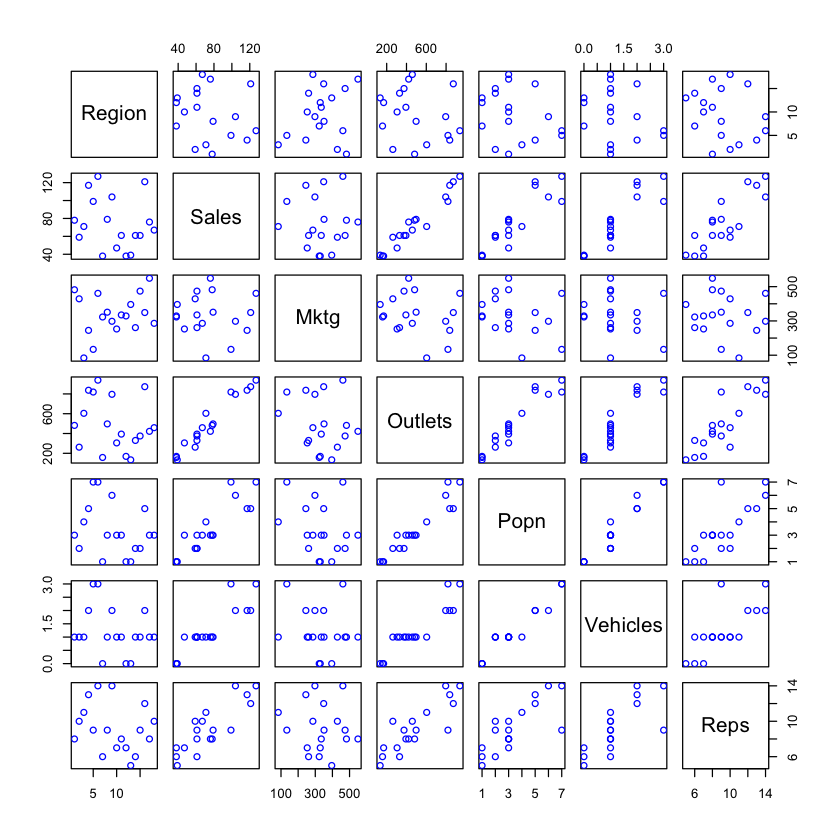

In [5]:
plot(data, col = 'Blue')

In [6]:
Marketing<-data$Mktg*1000
Sales<-data$Sales*1000

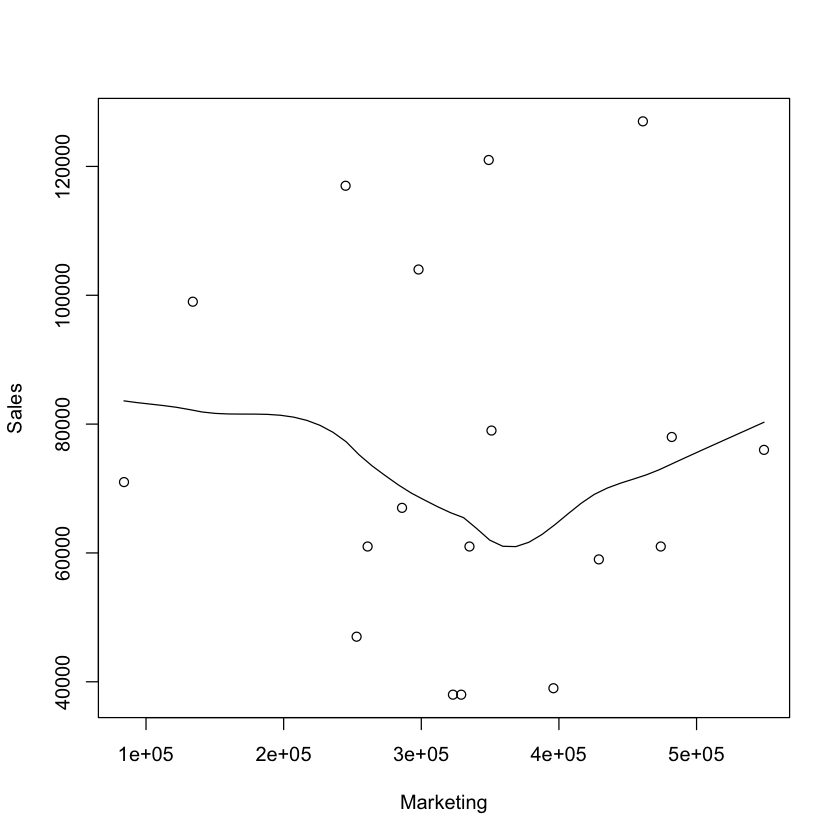

In [7]:
scatter.smooth(Marketing, Sales
              )

In [7]:
cor(Marketing, Sales)

[1] -0.03474256

In [8]:
boxplot.stats(Marketing)

$stats
[1]  84000 261000 332000 429000 549000

$n
[1] 18

$conf
[1] 269435.2 394564.8

$out
numeric(0)

## Part1) We would like to investigate the impact of marketing efforts on sales. To that end, run a regression model with “Sales” as the response variable and “Mktg” as the (only) explanatory variable. Copy and paste the R code and the output, and writethree key findings that you can infer from this analysis.

In [8]:
linearmod_only_marketing<-lm(Sales~Marketing)

In [9]:
linearmod_whole_data<-lm(Sales~Mktg+Region+Outlets+Popn+Vehicles+Reps, data = data)

In [10]:
summary(linearmod_only_marketing)


Call:
lm(formula = Sales ~ Marketing)

Residuals:
   Min     1Q Median     3Q    Max 
-36714 -14685  -6855  18193  53426 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  7.738e+04  2.110e+04   3.667  0.00208 **
Marketing   -8.265e-03  5.944e-02  -0.139  0.89114   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29310 on 16 degrees of freedom
Multiple R-squared:  0.001207,	Adjusted R-squared:  -0.06122 
F-statistic: 0.01934 on 1 and 16 DF,  p-value: 0.8911


# Answer 1
## 1) Adjusted R squared is negative in this case.
## 2) p-value is significantly high so that we have reject the null hypothesis.
## 3) Intercept is positive that means if zero expenditure is there on marketing, there would be sales.

## Part2) Now, we would like to investigate the impact of all variables. To that end, run a regression model with “Sales” as the response variable and all other variables in the data set as predictor variables. Copy and paste the R code and the output, and writethree key findings that you can infer from this analysis. Does anything in this output strike you as “strange”?

In [11]:
summary(linearmod_whole_data)


Call:
lm(formula = Sales ~ Mktg + Region + Outlets + Popn + Vehicles + 
    Reps, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6819 -1.2894  0.2493  2.5316  4.3800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.29971    6.09802   2.017  0.06877 .  
Mktg         0.03732    0.01002   3.723  0.00336 ** 
Region      -0.14240    0.21094  -0.675  0.51358    
Outlets      0.13417    0.01658   8.094 5.84e-06 ***
Popn        -6.32892    2.76251  -2.291  0.04270 *  
Vehicles     6.51666    4.58553   1.421  0.18300    
Reps        -0.14921    0.80056  -0.186  0.85554    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.277 on 11 degrees of freedom
Multiple R-squared:  0.9854,	Adjusted R-squared:  0.9774 
F-statistic: 123.6 on 6 and 11 DF,  p-value: 1.918e-09


# Answer 2
## 1) Residual Standard Error very less compared to the above model.
## 2) p-value is less than 0.05, hence we will not reject null hypothesis.
## 3) Adjusted R squared is higher than the previous model.

### The strange thing to note about this is that intercept is 12.29971, so this basically means that if there is nothing, if outlets, marketing, region and rest of all the variables are turned down to zero, we can still experience sales and this is very absurd.

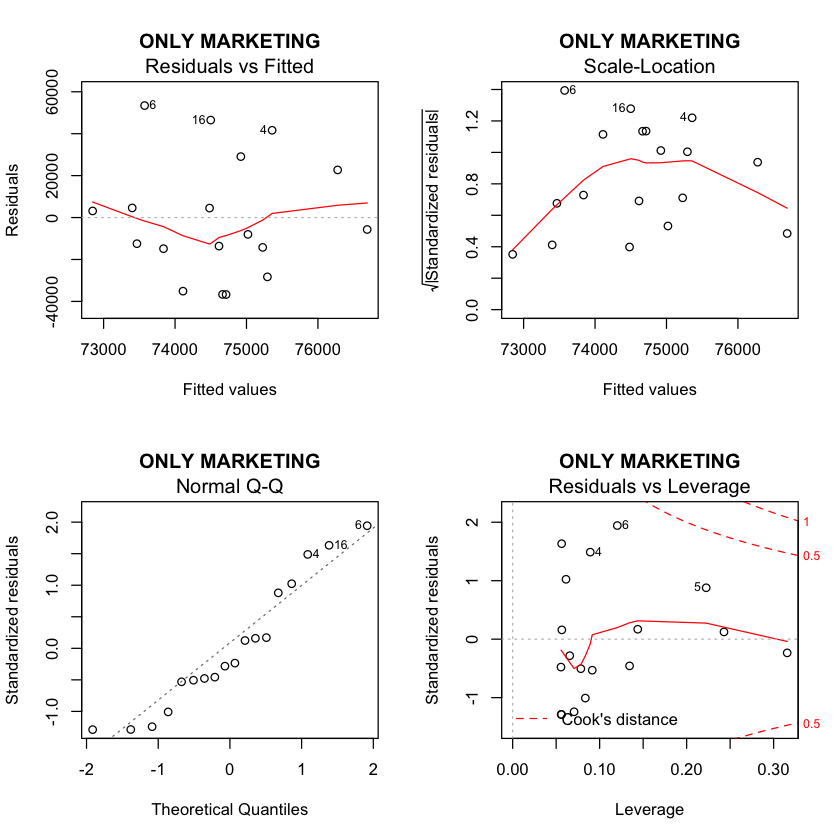

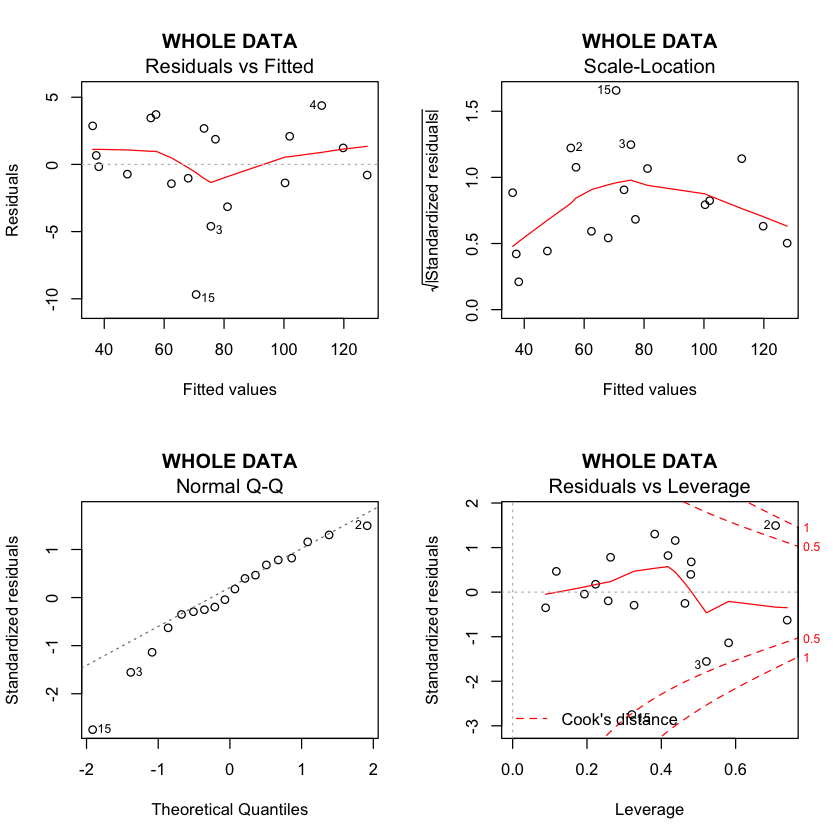

In [14]:
layout(matrix(c(1,2,3,4),2,2))
plot(linearmod_only_marketing, main= 'ONLY MARKETING')
plot(linearmod_whole_data, main = 'WHOLE DATA')

In [14]:
AIC(linearmod_whole_data)

[1] 110.5343

In [15]:
BIC(linearmod_whole_data)

[1] 117.6572

In [16]:
AIC(linearmod_only_marketing)

[1] 425.2521

In [17]:
BIC(linearmod_only_marketing)

[1] 427.9233

## Part 3 )Create a table listing the multiple R-squared, adjusted R-squared, AIC, and BIC of the two models above. Which is the better model and why?

## Answer 3)

## Just by looking at the upper table, the model accounting for all variables is better because an increased Multiple R-sq, adjusted R-sq and decreased AIC and BIC are desirable.